**Run the following two cells before you begin.**

In [1]:
%autosave 10

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

______________________________________________________________________
**First, import your data set and define the sigmoid function.**
<details>
    <summary>Hint:</summary>
    The definition of the sigmoid is $f(x) = \frac{1}{1 + e^{-X}}$.
</details>

In [3]:
# Import the data set
df=pd.read_csv('C:\Data-Science-Intern-2-Mini-Project-Task\Task-1\cleaned_data.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [6]:
features_response=[ 'LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']

corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


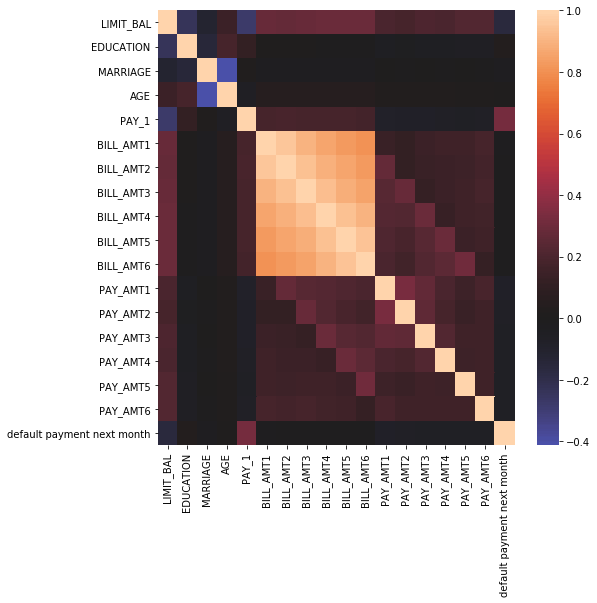

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

## F-test and Univariate Feature Selection

In [8]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [9]:
# Import the f_classif function and feed in the features and response:
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [10]:
# Create a DataFrame of feature names, F-statistics, and p-values, and show it sorted on p-value:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [11]:
# To select the top 20% of features according to the F-test
from sklearn.feature_selection import SelectPercentile

In [12]:
selector = SelectPercentile(f_classif, percentile=20)

In [13]:
# Use the .fit method to fit the object on our features and response data, similar to how a model would be fit
selector.fit(X, y)

SelectPercentile(percentile=20,
                 score_func=<function f_classif at 0x000001F5BB1C5E58>)

In [14]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [15]:
# Obtain the feature names by using all but the last element (the response variable name) of our features_response list
features = features_response[:-1]

In [16]:
best_features = [features[counter] for counter in range(len(features))
                 if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

## Visualizing the Relationship between Features and Response

In [17]:
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [18]:
group_by_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_by_pay_mean_y

,default payment next month
PAY_1,
-2,0.131664
-1,0.170002
0,0.128295
1,0.336400
2,0.694701
3,0.773973
4,0.682540
5,0.434783
6,0.545455


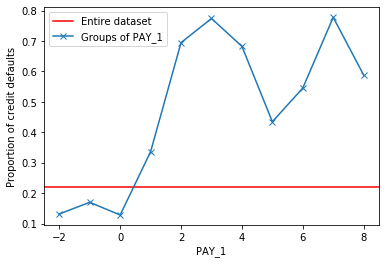

In [19]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_by_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proportion of credit defaults')
axes.legend(['Entire dataset', 'Groups of PAY_1'])

In [20]:
# Logical masks for for positive and negative samples
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Credit limits by response variable')

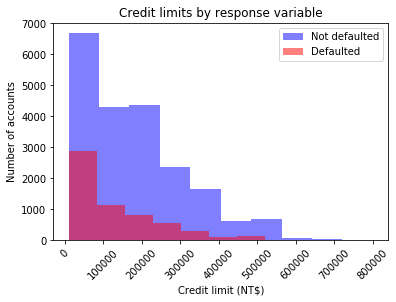

In [21]:
# create the dual histogram plot with the aforementioned properties
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)')
axes.set_ylabel('Number of accounts')
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Credit limits by response variable')

In [22]:
# Create the histogram bin edges with this code, which also prints the final bin edge as a check:
bin_edges = list(range(0,850000,50000))
print(bin_edges[-1])

800000


Text(0.5, 1.0, 'Normalized distributions of credit limits by response variable')

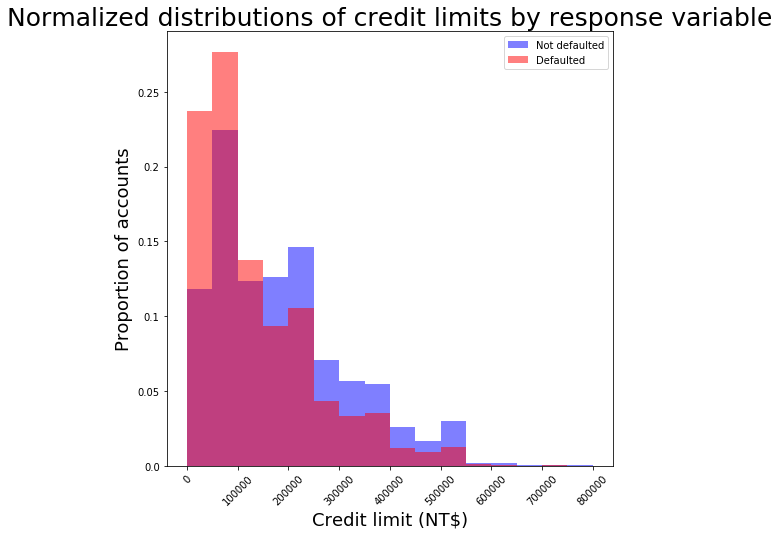

In [23]:
plt.figure(figsize=(8,8))
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edges, alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Credit limit (NT$)',fontsize=18)
axes.set_ylabel('Proportion of accounts',fontsize=18)
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['Not defaulted', 'Defaulted'])
axes.set_title('Normalized distributions of credit limits by response variable',fontsize=25)

In [24]:
np.mean([1,2,3,4,5])

3.0

In [25]:
def my_mean(input_argument):
    output = sum(input_argument)/len(input_argument)
    return(output)

In [26]:
my_mean([1,2,3,4,5])

3.0

In [27]:
X_exp = np.linspace(-4,4,81)
print(X_exp[:5])
print(X_exp[-5:])

[-4.  -3.9 -3.8 -3.7 -3.6]
[3.6 3.7 3.8 3.9 4. ]


In [28]:
Y_exp = np.exp(X_exp)
Y_exp[:5]

array([0.01831564, 0.02024191, 0.02237077, 0.02472353, 0.02732372])

In [29]:
# Define the sigmoid function
def sigmoid(X):
    Y = 1 / (1 + np.exp(-X))
    return Y

Text(0.5, 1.0, 'The Sigmoid function')

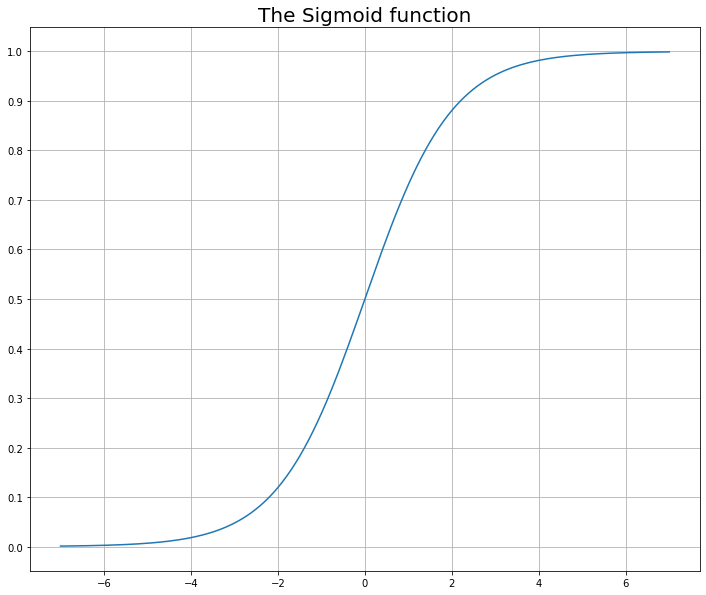

In [30]:
X_sig = np.linspace(-7,7,141)
Y_sig = sigmoid(X_sig)
plt.figure(figsize=(12,10))
plt.plot(X_sig,Y_sig)
plt.yticks(np.linspace(0,1,11))
plt.grid()
plt.title('The Sigmoid function',fontsize=20)

**Now, create a train/test split (80/20) with `PAY_1` and `LIMIT_BAL` as features and `default payment next month` as values. Use a random state of 24.**

In [31]:
# Create a train/test split
features = ["PAY_1","LIMIT_BAL"]
X = df[features].values
y = df["default payment next month"].values

In [32]:
X.shape

(26664, 2)

In [33]:
y.shape

(26664,)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 ,random_state = 42)

In [35]:
print("X_train shape is :",X_train.shape)
print("X_test shape is :",X_test.shape)
print("y_train shape is :",y_train.shape)
print("X_test shape is :",y_test.shape)

X_train shape is : (21331, 2)
X_test shape is : (5333, 2)
y_train shape is : (21331,)
X_test shape is : (5333,)


______________________________________________________________________
**Next, import LogisticRegression, with the default options, but set the solver to `'liblinear'`.**

In [36]:
from sklearn.linear_model import LogisticRegression
Logistic_Regression= LogisticRegression(solver="liblinear")

______________________________________________________________________
**Now, train on the training data and obtain predicted classes, as well as class probabilities, using the testing data.**

In [37]:
# Fit the logistic regression model on training data
Logistic_Regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Make predictions using `.predict()`
y_pred = Logistic_Regression.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Find class probabilities using `.predict_proba()`
pred_proba = Logistic_Regression.predict_proba(X_test)
pred_proba

array([[0.86916481, 0.13083519],
       [0.94481988, 0.05518012],
       [0.66290875, 0.33709125],
       ...,
       [0.72047061, 0.27952939],
       [0.8053691 , 0.1946309 ],
       [0.87666522, 0.12333478]])

______________________________________________________________________
**Then, pull out the coefficients and intercept from the trained model and manually calculate predicted probabilities. You'll need to add a column of 1s to your features, to multiply by the intercept.**

In [40]:
# Add column of 1s to features
np.ones((X_test.shape[0],1))

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [41]:
np.ones((X_test.shape[0],1)).shape

(5333, 1)

In [42]:
ones_feats = np.hstack([np.ones((X_test.shape[0],1)),X_test])

In [43]:
# Get coefficients and intercepts from trained model
print('Coefficients Of Our Logistic Model',Logistic_Regression.coef_)
print('Intercept of Our Logistic Model',Logistic_Regression.intercept_)
log_model_coeff=Logistic_Regression.coef_
log_model_intercept=Logistic_Regression.intercept_

Coefficients Of Our Logistic Model [[ 8.22976574e-11 -6.76283688e-06]]
Intercept of Our Logistic Model [-6.59255497e-11]


In [44]:
coeff_interc_feats=np.concatenate([log_model_intercept.reshape(1,1),log_model_coeff],axis=1)
coeff_interc_feats

array([[-6.59255497e-11,  8.22976574e-11, -6.76283688e-06]])

In [45]:
# Manually calculate predicted probabilities
pred_proba_manual=np.dot(coeff_interc_feats,np.transpose(ones_feats))
pred_proba_manual

array([[-1.89359433, -2.84039149, -0.67628369, ..., -0.94679716,
        -1.42019575, -1.9612227 ]])

In [46]:
sig_man_predproba = sigmoid(pred_proba_manual)
sig_man_predproba

array([[0.13083519, 0.05518012, 0.33709125, ..., 0.27952939, 0.1946309 ,
        0.12333478]])

______________________________________________________________________
**Next, using a threshold of `0.5`, manually calculate predicted classes. Compare this to the class predictions output by scikit-learn.**

In [47]:
# Manually calculate predicted classes
pred_manual= sig_man_predproba >= 0.5
pred_manual

array([[False, False, False, ..., False, False, False]])

In [48]:
pred_manual.shape

(1, 5333)

In [49]:
# Compare to scikit-learn's predicted classes
np.array_equal(pred_manual,y_pred.reshape(1,-1))

True

______________________________________________________________________
**Finally, calculate ROC AUC using both scikit-learn's predicted probabilities, and your manually predicted probabilities, and compare.**

In [50]:
from sklearn.metrics import roc_auc_score

In [51]:
# Use scikit-learn's predicted probabilities to calculate ROC AUC
roc_auc_score(y_test,pred_proba[:,1])

0.6374912949931919

In [52]:
# Use manually calculated predicted probabilities to calculate ROC AUC
roc_auc_score(y_test,pred_proba_manual.reshape(pred_proba_manual.shape[1],))

0.6374912949931919